# Exploratory Data Analysis and Hypothesis Testing on Ames Housing Dataset

**Author:** Laura Puerto  
**Date:** March 30, 2025  
**Project:** Final Assessment – IBM Data Analyst Professional Certificate

This project is part of the IBM Data Analyst Professional Certificate (Optional Honors Assignment).  
Our objective is to perform a complete exploratory data analysis (EDA), formulate hypotheses, and test one of them statistically.  
We’ll work with the **Ames Housing dataset**, which provides detailed information about house sales in Ames, Iowa.

---



# 1. 📁 Dataset Description


---

---

## 📥 Data Loading

We start by importing the dataset into a pandas DataFrame.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/AmesHousing.csv")

---

## 🗂️ Dataset Overview

Let’s take a look at the size of the dataset and the first few rows to get an initial sense of the data.

- **Number of rows (observations):** each row represents a house sold.
- **Number of columns (features):** each column represents an attribute (e.g., lot area, year built, sale price, neighborhood...).


In [2]:
# Display dataset dimensions (rows, columns)
print("Shape:", df.shape)

# Show the first few rows of the dataset
df.head()

Shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


---

## 🧾 Column Summary and Data Types

We’ll now inspect the structure of the dataset: column names, data types, and presence of missing values.  
This step helps us understand what kind of preprocessing may be needed before analysis.


In [3]:
# General information about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

---

## 🧩 Variables: Categorical vs. Numerical

To prepare for feature engineering and transformation, we identify how many categorical and numerical variables we have.

- **Categorical variables** often require encoding or grouping.
- **Numerical variables** may need normalization or transformation (e.g., log scale).


In [4]:
# Select categorical variables
cat_vars = df.select_dtypes(include='object')

# Select numerical variables
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Print the number of variables of each type
print("Number of categorical variables:", cat_vars.shape[1])
print("Number of numerical variables:", num_vars.shape[1])

Number of categorical variables: 43
Number of numerical variables: 39


---

## 📊 Descriptive Statistics

We generate basic descriptive statistics for the numerical variables in the dataset.  
This helps us identify potential outliers, the range of values, and the central tendency of each variable.

We will use this information later to guide our cleaning and transformation decisions.

In [5]:
# Distribution of unique values in categorical variables
cat_vars.nunique().sort_values(ascending=False)

Neighborhood      28
Exterior 2nd      17
Exterior 1st      16
Sale Type         10
Condition 1        9
Functional         8
Condition 2        8
House Style        8
Roof Matl          8
MS Zoning          7
Garage Type        6
Heating            6
BsmtFin Type 2     6
BsmtFin Type 1     6
Foundation         6
Sale Condition     6
Roof Style         6
Lot Config         5
Misc Feature       5
Garage Cond        5
Garage Qual        5
Fireplace Qu       5
Kitchen Qual       5
Mas Vnr Type       5
Heating QC         5
Electrical         5
Bsmt Qual          5
Bsmt Cond          5
Bldg Type          5
Exter Cond         5
Exter Qual         4
Bsmt Exposure      4
Land Contour       4
Fence              4
Lot Shape          4
Pool QC            4
Paved Drive        3
Utilities          3
Land Slope         3
Garage Finish      3
Street             2
Central Air        2
Alley              2
dtype: int64

In [6]:
# Descriptive statistics for numerical variables
num_vars.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


---


# 2. 🔍 Initial Plan for Data Exploration


---


Before diving into detailed analysis, it is important to define an initial exploration plan.

We aim to:
- Understand the **distribution** of key numerical variables (e.g., `SalePrice`, `GrLivArea`, `LotArea`).
- Investigate **relationships** between predictors and the target variable `SalePrice`.
- Explore the impact of **categorical variables** such as `Neighborhood`, `HouseStyle`, or `OverallQual` on housing prices.
- Detect possible **missing values**, **outliers**, or **inconsistencies** in the data.
- Identify which features might require **transformation** (e.g., log scaling or encoding).

This plan will help guide the data cleaning and feature engineering process in the next steps.


---


# 3. 🧹 Data Cleaning – Missing Values Analysis


---

As part of the data cleaning process, we start by identifying missing values in the dataset.

This step is essential to determine which features require imputation, removal, or special handling before proceeding with analysis and modeling.

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Filter and display only features with missing values
missing_values[missing_values > 0].sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Cars          1
Garage Area          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

### Missing Values Treatment

We now apply tailored strategies to handle the missing values:

- For categorical features where missingness indicates absence (e.g., no pool, no alley), we replace `NaN` with `"None"`.
- For numerical features with very few missing values, we use **median** or **mode** imputation.


In [8]:
# Replace missing values with "None" where missingness means absence of feature
none_replacements = [
    'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
    'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'
]

df[none_replacements] = df[none_replacements].fillna("None")

# Impute numerical features with low number of missing values
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Garage Area'] = df['Garage Area'].fillna(df['Garage Area'].median())
df['Garage Cars'] = df['Garage Cars'].fillna(df['Garage Cars'].median())
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].median())
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")


In [9]:
# Recheck missing values
df.isnull().sum()[df.isnull().sum() > 0]

Lot Frontage      490
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
dtype: int64

### Additional Missing Values Handling

After the initial replacements, a few variables still have missing values.  
Most of them are related to the basement and garage, and the appropriate strategy is to replace missing values with 0, as they likely indicate absence of those features.

For `Lot Frontage`, we will use the median value as a simple imputation strategy.


In [10]:
# Replace basement-related missing values with 0
basement_vars_with_nans = [
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'
]

df[basement_vars_with_nans] = df[basement_vars_with_nans].fillna(0)

# Impute Garage Year Built with 0 (assume no garage)
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

# Impute Lot Frontage with median (could also do median by neighborhood for better accuracy)
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())


In [11]:
# Recheck missing values
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

### 📈 Outlier Detection

Outliers are extreme values that can distort statistical analysis and model performance.  
We begin by analyzing the distribution of the target variable `SalePrice`, and a key numerical feature `GrLivArea`.

We will use histograms and boxplots to visualize potential anomalies.

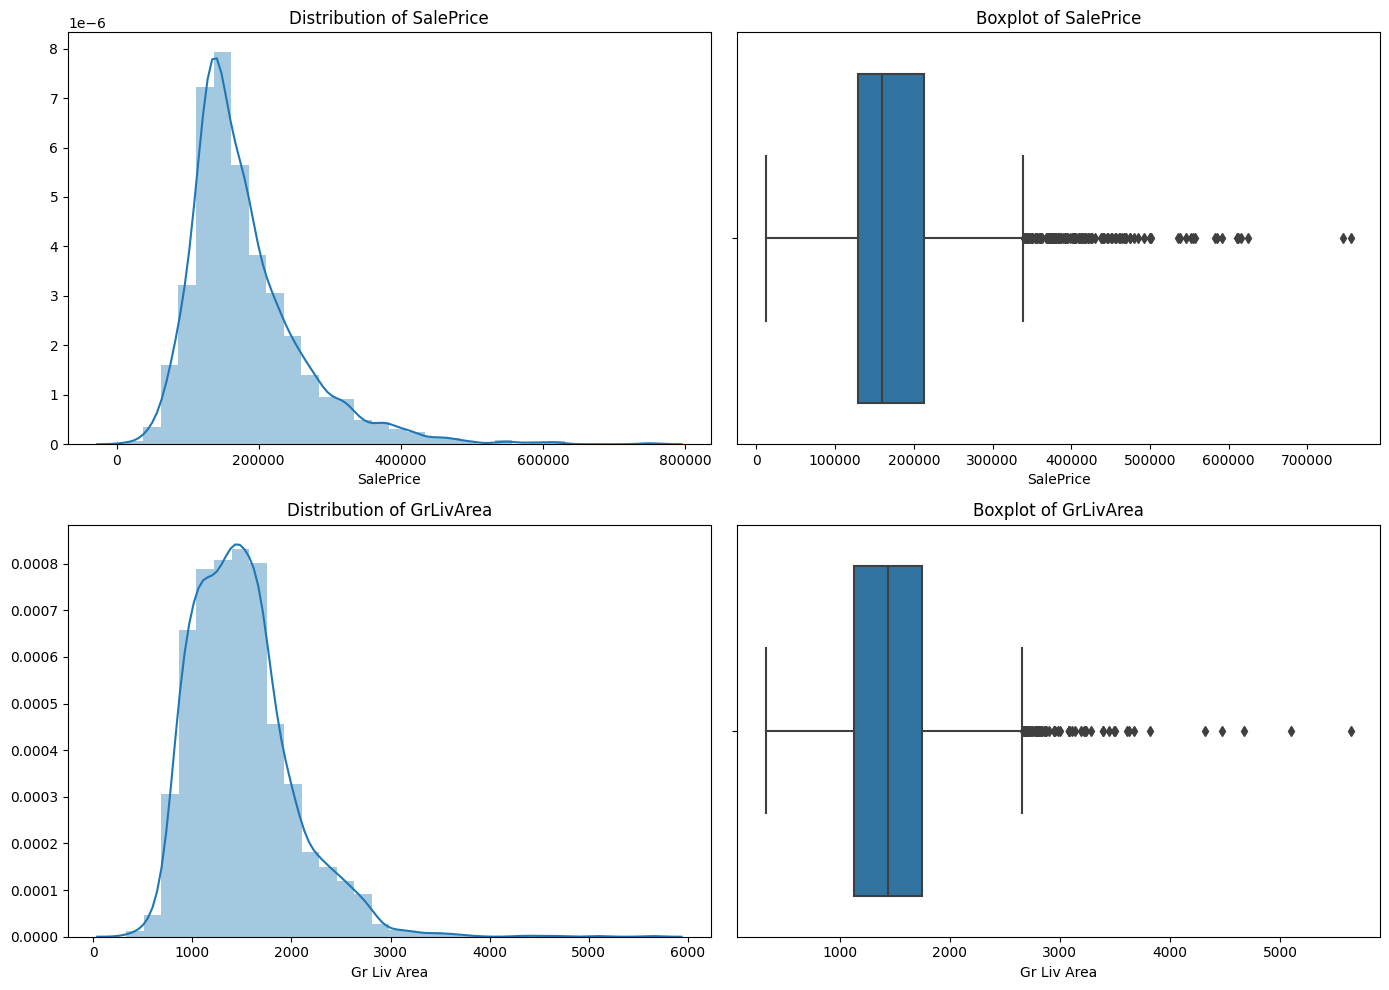

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up side-by-side plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for SalePrice
sns.distplot(df['SalePrice'], kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of SalePrice')

# Boxplot for SalePrice
sns.boxplot(x=df['SalePrice'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of SalePrice')

# Histogram for GrLivArea
sns.distplot(df['Gr Liv Area'], kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of GrLivArea')

# Boxplot for GrLivArea
sns.boxplot(x=df['Gr Liv Area'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of GrLivArea')

plt.tight_layout()
plt.show()


### Log-Transformation of SalePrice

To reduce skewness and improve model performance, we apply a log transformation to the `SalePrice` variable.

This transformation is commonly used in housing price prediction tasks, especially when the target variable is right-skewed.


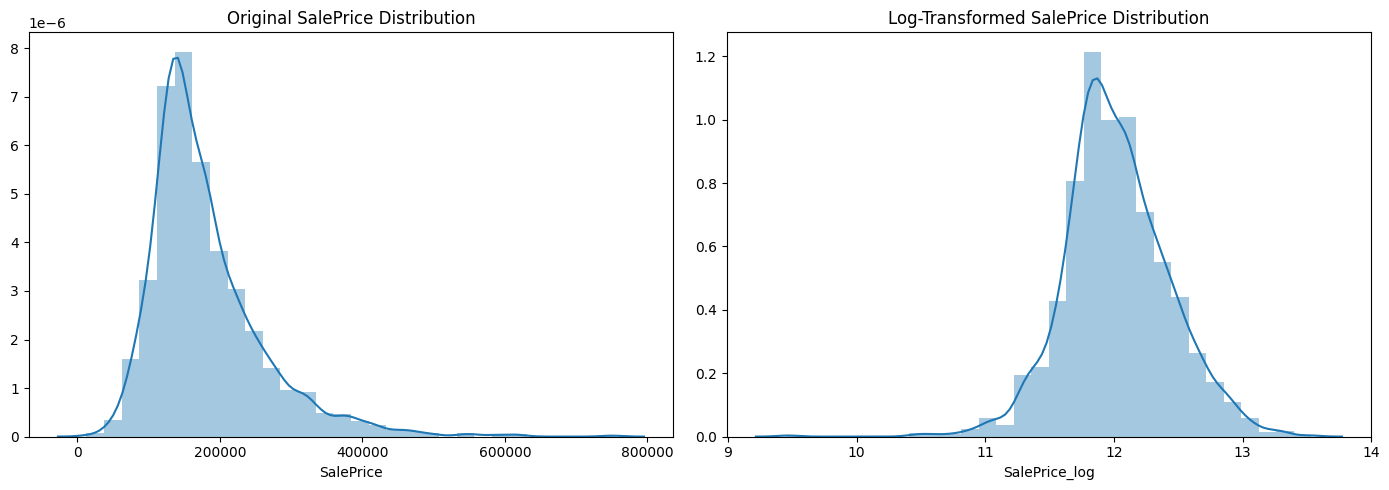

In [13]:
import numpy as np

# Apply log-transformation using log1p (log(x + 1)) to avoid issues with 0
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# Compare distributions before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.distplot(df['SalePrice'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Original SalePrice Distribution')

sns.distplot(df['SalePrice_log'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Log-Transformed SalePrice Distribution')

plt.tight_layout()
plt.show()


### Log-Transformation of Gr Liv Area

As with `SalePrice`, the `Gr Liv Area` variable also showed a right-skewed distribution.  
We apply a log-transformation to reduce skewness and improve linear relationships with the target variable.


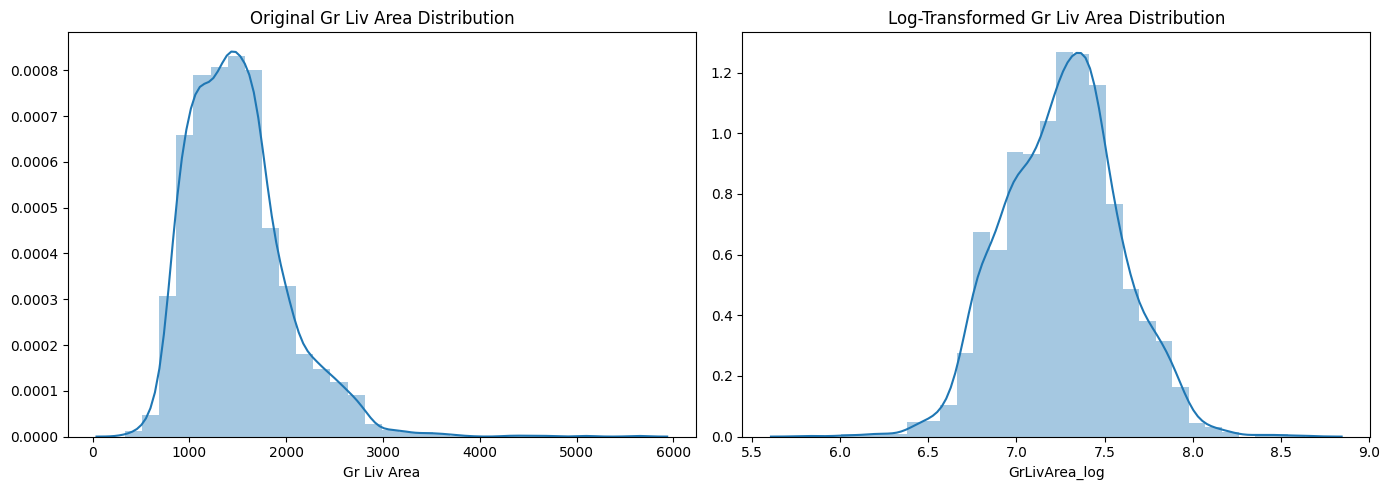

In [14]:
# Apply log-transformation using log1p
df['GrLivArea_log'] = np.log1p(df['Gr Liv Area'])

# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.distplot(df['Gr Liv Area'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Original Gr Liv Area Distribution')

sns.distplot(df['GrLivArea_log'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Log-Transformed Gr Liv Area Distribution')

plt.tight_layout()
plt.show()


---


## 4. 🔍 Key Findings and Insights


---

We now explore the relationships between key variables and the target variable `SalePrice_log`,  
in order to extract actionable insights that could be useful for modeling and decision-making.

We focus on the following variables:
- `GrLivArea_log` (log of ground living area)
- `OverallQual` (overall material and finish quality)
- `Neighborhood` (location of the property)
- `HouseStyle` (style of dwelling)


📉 1. GrLivArea_log vs SalePrice_log (scatterplot)

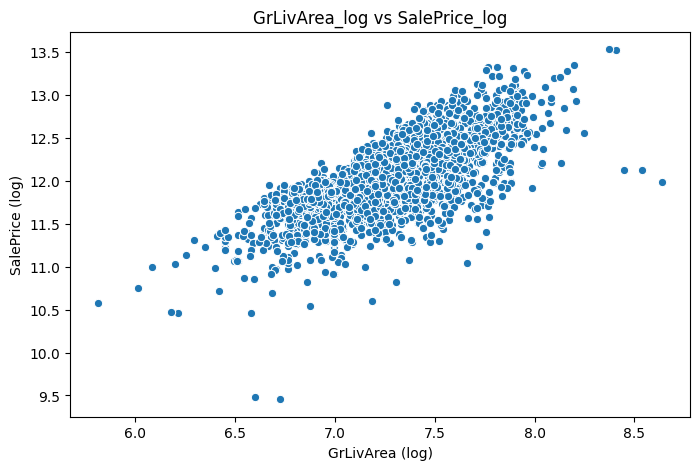

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['GrLivArea_log'], y=df['SalePrice_log'])
plt.title('GrLivArea_log vs SalePrice_log')
plt.xlabel('GrLivArea (log)')
plt.ylabel('SalePrice (log)')
plt.show()

📈 2. OverallQual vs SalePrice_log (boxplot)

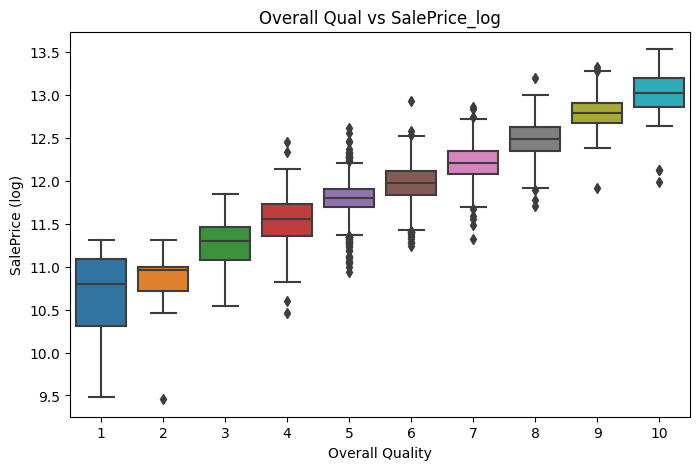

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Overall Qual'], y=df['SalePrice_log'])
plt.title('Overall Qual vs SalePrice_log')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice (log)')
plt.show()

🏘️ 3. Neighborhood vs SalePrice_log (boxplot con rotación)

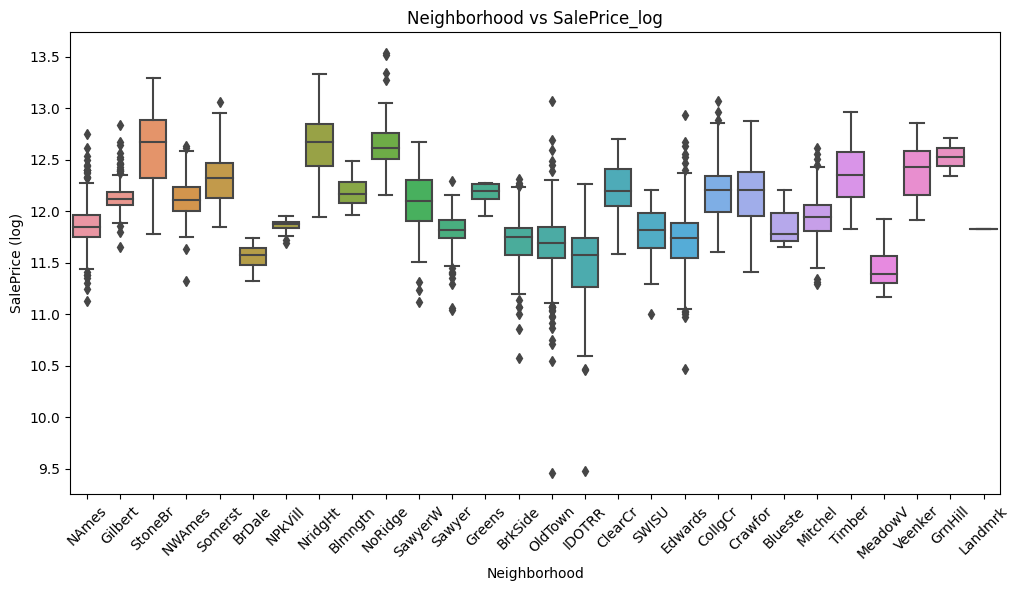

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice_log'])
plt.xticks(rotation=45)
plt.title('Neighborhood vs SalePrice_log')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice (log)')
plt.show()

🏠 4. HouseStyle vs SalePrice_log

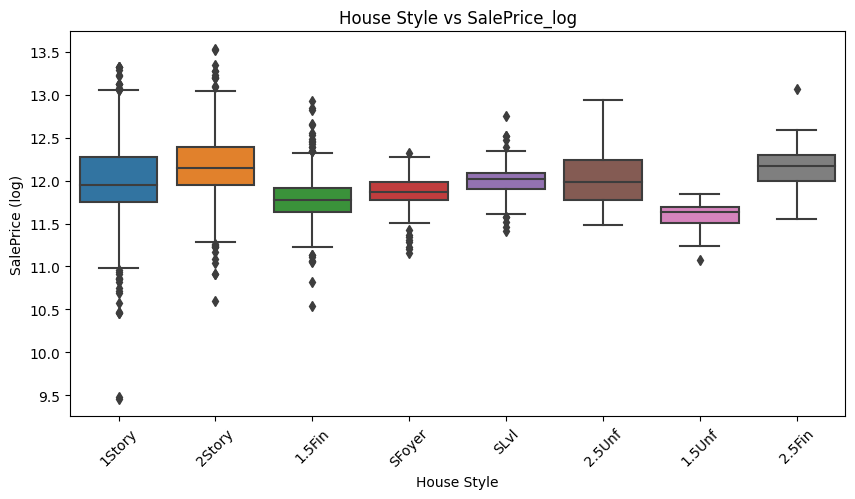

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['House Style'], y=df['SalePrice_log'])
plt.xticks(rotation=45)
plt.title('House Style vs SalePrice_log')
plt.xlabel('House Style')
plt.ylabel('SalePrice (log)')
plt.show()

---


## 6. 📊 Hypothesis Testing: Overall Quality vs SalePrice_log


---

We now perform a formal significance test to determine whether homes with higher overall quality (`OverallQual`)  
have significantly different average `SalePrice_log` compared to homes with lower quality.

We define:
- Low quality: `OverallQual` ≤ 5
- High quality: `OverallQual` > 5

We use an **independent two-sample t-test** to compare the mean `SalePrice_log` between the two groups.


In [20]:
from scipy.stats import ttest_ind

# Create groups
low_quality = df[df['Overall Qual'] <= 5]['SalePrice_log']
high_quality = df[df['Overall Qual'] > 5]['SalePrice_log']

# Perform t-test
t_stat, p_val = ttest_ind(high_quality, low_quality, equal_var=False)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 42.68269628981319
P-value: 1.582964306605646e-302


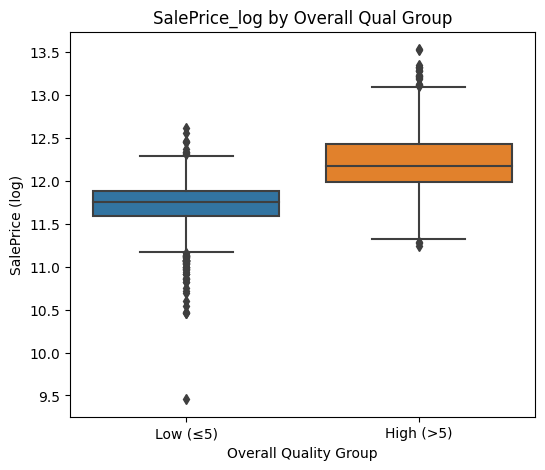

In [21]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=pd.cut(df['Overall Qual'], bins=[1, 5, 10], labels=['Low (≤5)', 'High (>5)']), y=df['SalePrice_log'])
plt.title('SalePrice_log by Overall Qual Group')
plt.xlabel('Overall Quality Group')
plt.ylabel('SalePrice (log)')
plt.show()